<a href="https://colab.research.google.com/github/mgarbanzo/GOESR_Fundamentos/blob/main/GOES_R_FUNDAMENTOS_SUVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

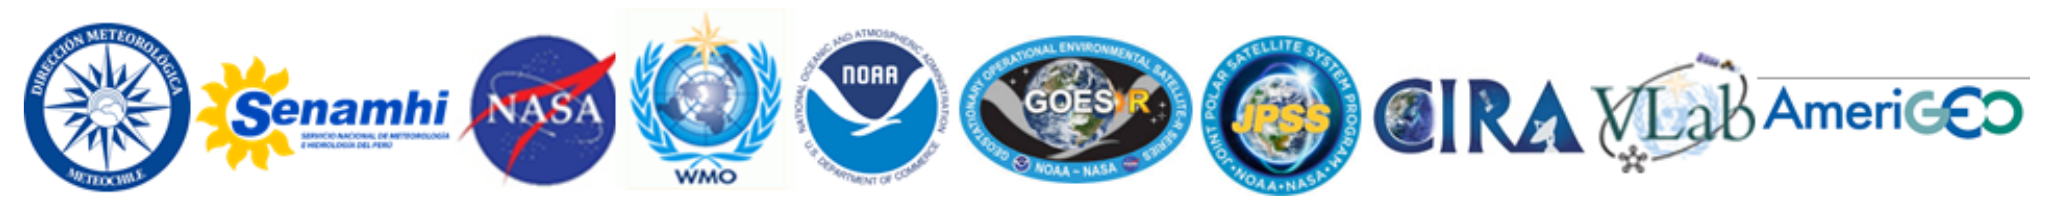

# Práctica de Python en la nube para generar el producto del GLM de GOES 16

##Taller‌ ‌Virtual‌ ‌sobre‌ ‌Aplicaciones‌ ‌Satelitales‌ ‌OMM‌ ‌AR-III‌

La **meta de aprendizaje** para este cuaderno es comprender como se leen,extraen y grafican los datos de un archivo generado por el instrumento SUVI del satélite GOES-16.

Nivel Básico

In [2]:
from netCDF4 import Dataset      # Lectura de datos en formato NetCDF
import numpy as np               # Manipulación de arreglos numéricos
import pylab as plt              # Graficación de datos

# Primero debemos descargar datos. Se utilizará el sensor SUVI.

In [3]:
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe284/2021/311/18/OR_SUVI-L1b-Fe284_G16_s20213111800160_e20213111800170_c20213111800443.nc

--2021-11-08 14:48:48--  https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe284/2021/311/18/OR_SUVI-L1b-Fe284_G16_s20213111800160_e20213111800170_c20213111800443.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.168.137
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.168.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4991259 (4.8M) [binary/octet-stream]
Saving to: ‘OR_SUVI-L1b-Fe284_G16_s20213111800160_e20213111800170_c20213111800443.nc’

OR_SUVI-L1b-Fe284_G 100%[===================>]   4.76M  19.9MB/s    in 0.2s    

2021-11-08 14:48:49 (19.9 MB/s) - ‘OR_SUVI-L1b-Fe284_G16_s20213111800160_e20213111800170_c20213111800443.nc’ saved [4991259/4991259]



Cargamos los metadatos del archivo en la variable **archivo** y luego mostramos los metadatos que contiene al introducir su nombre en una casilla de código:

In [4]:
archivo = Dataset("/content/OR_SUVI-L1b-Fe284_G16_s20213111800160_e20213111800170_c20213111800443.nc")

In [5]:
archivo

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    production_site: RBU
    dataset_name: OR_SUVI-L1b-Fe284_G16_s20213111800160_e20213111800170_c20213111800443.nc
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    iso_series_metadata_id: f5816f57-fd6d-11e3-a3ac-0800200c9a66
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: SUVI L1b Solar Imagery: EUV
    summary: SUVI L1b Solar Imagery: EUV Products are images of the sun at six wavelengths and multiple radiance level ranges spanning many orders of magnitude in support of viewing the sun during different types of solar activity. Different combinations of aperture pos

Se observa en los metadatos que RAD tiene grandes dimensiones. Veamos que contiene:

In [6]:
archivo.variables['RAD']

<class 'netCDF4._netCDF4.Variable'>
int16 RAD(NAXIS2, NAXIS1)
    _FillValue: -32768
    long_name: SUVI L1b Solar Imagery
    sensor_bit_depth: 16
    valid_range: [-32767  32767]
    scale_factor: 0.0007099998
    add_offset: 16.264565
    units: W m-2 sr-1
unlimited dimensions: 
current shape = (1280, 1280)
filling on

Ahora se requiere extraer los datos del **archivo**:

En Python el punto que separa palabras indica que la segunda pertenece a la primera. En este caso **variables** está dentro de **archivo**. Finalmente **RAD** es el nombre de la variable que contiene la información que estamos buscando. La notación [:] es de Python y significa lea el contenido completo de principio a fin.

In [7]:
datos = archivo.variables['RAD'][:]

## Graficando los datos de SUVI

Ya que RAD es una matriz de datos podemos obtener una visualización rápida y simple de la información:

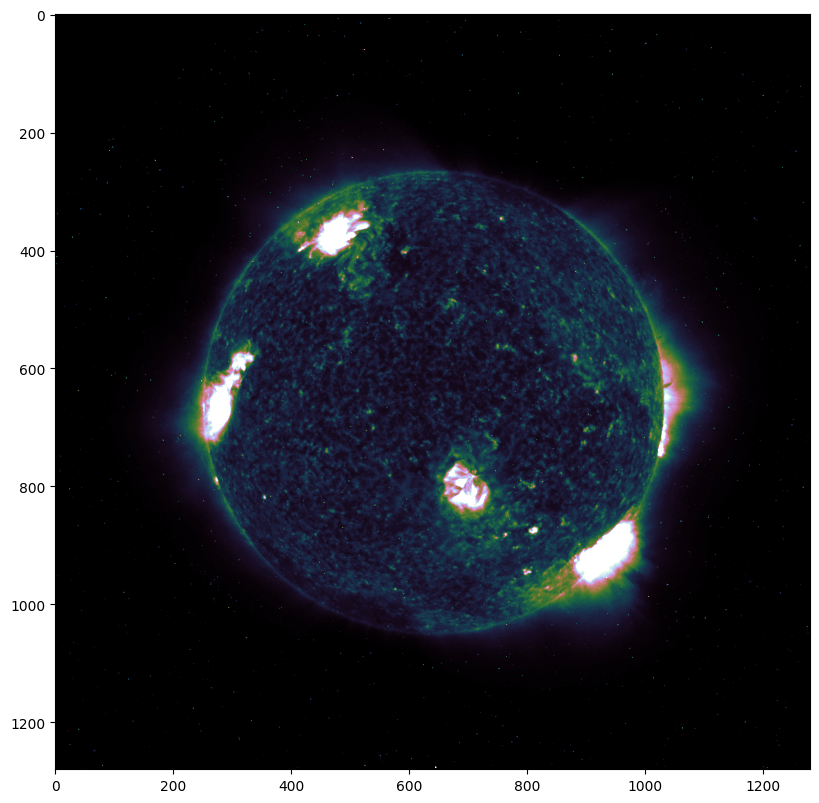

In [13]:
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(datos,cmap='cubehelix',vmin=0,vmax=5)